In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

import random
random.seed(42)

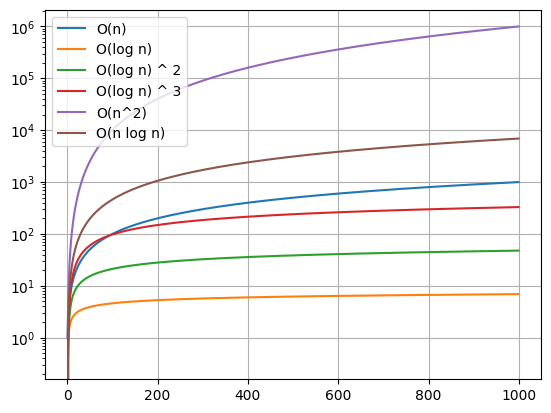

In [26]:
# O(n)
n_values = np.arange(1, 1000)

# O(n^2)
n_values_squared = n_values ** 2

# O(log n)
log_values = np.log(n_values)

# O(log n) ^ 2
logN_squared = np.log(n_values) ** 2

#O(n log n)
Nlog_values = np.log(n_values) * n_values

# O(log n) ^ 3
logN_cubed = np.log(n_values) ** 3

#take some values to plot the different functions
fig, ax = plt.subplots()
ax.plot(n_values, n_values, label="O(n)")
ax.plot(n_values, log_values, label="O(log n)")
ax.plot(n_values, logN_squared, label="O(log n) ^ 2")
ax.plot(n_values, logN_cubed, label="O(log n) ^ 3")
ax.plot(n_values, n_values_squared, label="O(n^2)")
ax.plot(n_values, Nlog_values, label="O(n log n)")

ax.legend()
ax.grid(True)
ax.set_yscale("log")

#store for later
complexity_fig = fig

In [27]:
def foo(a, b, counter):
    if a == 0:
        #print("a = 0")

        return (int(b), int(counter))
    
    elif b == 0: 
        #print("b = 0")

        return (int(a), int(counter))
    
    else:
        counter += 1
        #let (x,y) = (min(a,b), max(a,b))
        (x,y) = (min(a,b), max(a,b))

        #print(x,y)

        #recursive call, need to use return
        return foo(y, y % x, counter)

counter = 0
returned_value = 0

(returned_value, counter) = foo(1, 2 , 0)

print(f"value returned from foo: {returned_value} and runtime taken: {counter}")

value returned from foo: 2 and runtime taken: 1


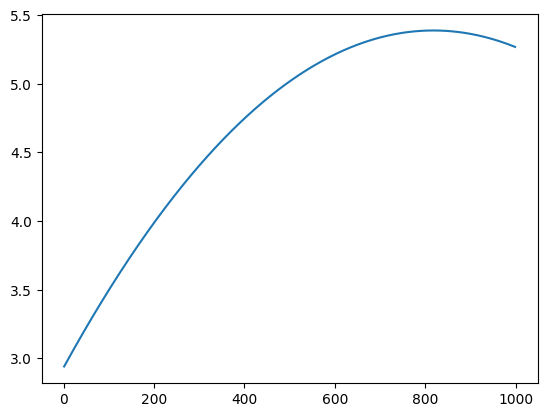

In [28]:
runtime_dict = defaultdict(list)

#we're going to run this many times to gather data on runtimes
for a in range(1, 1000):
    for b in range(1, 1000):
        returned_value, counter = foo(a, b, 0)

        #store the returned counter and the maximal of the 2 inputs (as a measure of complexity)
        #dictionary is best structure for this because you need to relate for polyfit function 
        complexity = max(a, b)
        runtime_dict[complexity].append(counter)

#get the average of the runtimes to pass to polyfit function 
complexities = sorted(runtime_dict.keys())
avg_runtimes = [sum(runtime_dict[c]) / len(runtime_dict[c]) for c in complexities]

#smoothen this curve so we don't have to look at jagged ugly plot
#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
coeffs = np.polyfit(complexities, avg_runtimes, deg = 2)
poly = np.poly1d(coeffs)

#use linspace to capture the range of the plot op
#https://numpy.org/devdocs/reference/generated/numpy.linspace.html
x_smooth = np.linspace(min(complexities), max(complexities), 500)
y_smooth = poly(x_smooth)

plt.plot(x_smooth, y_smooth)
plt.show()

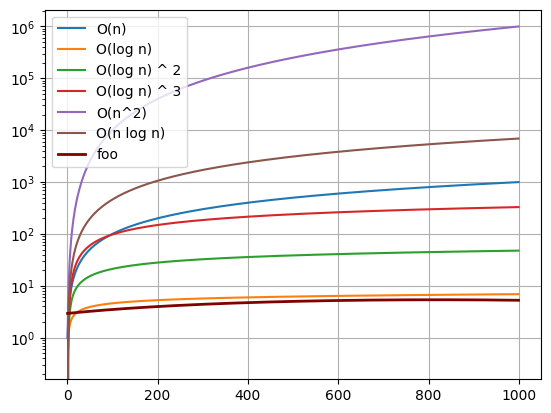

In [29]:
#plot the acquired data onto our already generated complexities graph
ax = complexity_fig.axes[0]
ax.plot(x_smooth, y_smooth, color = 'maroon', linewidth = 2, label = 'foo')
ax.legend()
complexity_fig.canvas.draw()

#we can see that it is O(log n)
complexity_fig

In [30]:
def longest_run(mylist, key, loop_counter):
    counters = []
    counter = 0
    #iterate by index to access individual elements
    for x in range(len(mylist)):
        loop_counter += 1

        #increment a counter and lazily append every match increment to the list
        if mylist[x] == key:
            counter += 1
            counters.append(counter)

        #streaks been broken so reset to 0 
        else:
            counter = 0

    #just return the highest count we reached
    if counters:
        return (max(counters), loop_counter)
    
    else:
        return (0, loop_counter)

(returned_counter, runtime) = longest_run([2,12,12,8,12,12,12,0,12,1], 12, 0)

print(f"longest run: {returned_counter} and runtime taken: {runtime}")

longest run: 3 and runtime taken: 10


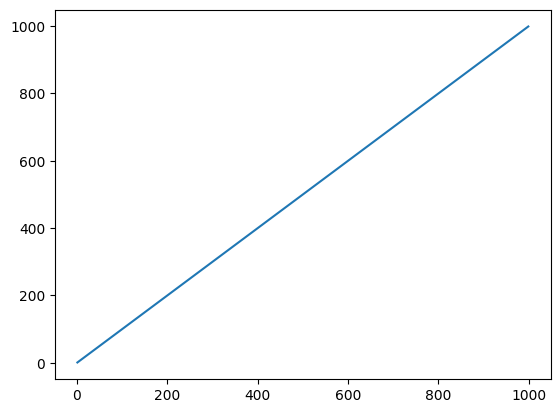

In [31]:
runtime_dict = defaultdict(list)

for size in range(1, 1000):
    test_list = [random.randint(0, 20) for x in range(size)]
    returned_counter, runtime = longest_run(test_list, 12, 0)
    runtime_dict[size].append(runtime)

#get the average of the runtimes to pass to polyfit function 
complexities = sorted(runtime_dict.keys())
avg_runtimes = [sum(runtime_dict[c]) / len(runtime_dict[c]) for c in complexities]

#smoothen this curve so we don't have to look at jagged ugly plot
#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
coeffs = np.polyfit(complexities, avg_runtimes, deg = 2)
poly = np.poly1d(coeffs)

#use linspace to capture the range of the plot op
#https://numpy.org/devdocs/reference/generated/numpy.linspace.html
x_smooth = np.linspace(min(complexities), max(complexities), 500)
y_smooth = poly(x_smooth)

plt.plot(x_smooth, y_smooth)
plt.show()

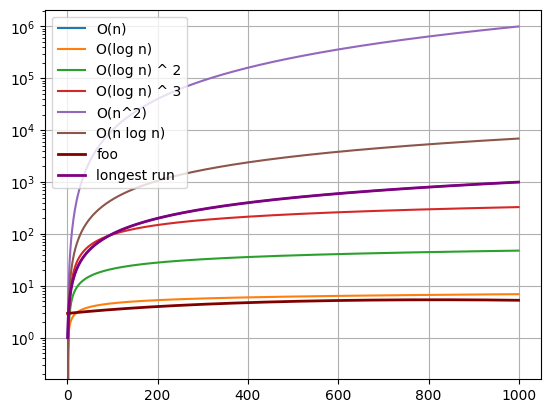

In [32]:
#plot the acquired data onto our already generated complexities graph
ax = complexity_fig.axes[0]
ax.plot(x_smooth, y_smooth, color = 'purple', linewidth = 2, label = 'longest run')
ax.legend()
complexity_fig.canvas.draw()

#we can see that it is O(n)
complexity_fig

In [33]:
class Result:
    """ done """
    def __init__(self, left_size, right_size, longest_size, is_entire_range):
        self.left_size = left_size              # the length of the longest run on left side of input
                                                # eg, with a key of 12, [12 12 3] has left_size of 2 
        self.right_size = right_size            # length of longest run on right side of input
                                                # eg, key 12, [3 12 12] has right_size of 2
        self.longest_size = longest_size        # length of longest run in input
                                                # eg, [12 12 4 12 12 12]: longest_size is 3
        self.is_entire_range = is_entire_range  # True if the entire input matches the key
        
    def __repr__(self):
        return('longest_size = %d left_size = %d right_size = %d is_entire_range = %s' %
              (self.longest_size, self.left_size, self.right_size, self.is_entire_range))

In [34]:
def longest_run_recursive(mylist, key, call_counter, left_size_track, right_size_track):
    call_counter[0] += 1

    if len(mylist) == 0:
        #print(f"base case 0: {Result(0, 0, 0, True), call_counter}")
        return Result(0, 0, 0, True), call_counter

    elif len(mylist) == 1:
        if mylist[0] == key:
            #print(f"base case 1: {Result(1, 1, 1, True), call_counter}")
            return Result(1, 1, 1, True), call_counter
        else:
            #print(f"base case 1: {Result(0, 0, 0, False), call_counter}")
            return Result(0, 0, 0, False), call_counter

    mid = len(mylist) // 2
    left = mylist[:mid]
    right = mylist[mid:]

    #print(f"left {left}")
    #print(f"right {right}")

    #trying to get left and right count to track the final 'high' for each side
    #rather than on an iteration basis, it is not working and realy bothering me 
    left_result, call_counter = longest_run_recursive(left, key, call_counter, left_size_track, right_size_track)
    right_result, call_counter = longest_run_recursive(right, key, call_counter, left_size_track, right_size_track)

    #if left side is a full house, add it to the current right left size to get the full run
    #left = [12,12,12] and right may start with 12 
    if left_result.is_entire_range:
        left_size = left_result.left_size + right_result.left_size
    
    #otherwise left is interupted at the end of the run [12,12,3] - so set the current record 
    else:
        left_size = left_result.left_size

    #same as left but inverted for the right size with left overlap 
    if right_result.is_entire_range:
        right_size = right_result.right_size + left_result.right_size
    
    else:
        right_size = right_result.right_size

    left_size_track.append(left_size)
    right_size_track.append(right_size)
 
    cross_run = 0
    #trying to capture values over the middle, if the right and left size indicate that the two partitions merge together
    if left_result.right_size > 0 and right_result.left_size > 0:
        cross_run = left_result.right_size + right_result.left_size

    #capture the longest of the results across the partitons 
    longest_size = max(left_result.longest_size, right_result.longest_size, cross_run)
    
    #if the paritions all indicate entire range, we're looking at a full house
    is_entire_range = left_result.is_entire_range and right_result.is_entire_range

    #should we store longest left and longest right? unsure how to handle the values here
    #print(Result(left_size, right_size, longest_size, is_entire_range), call_counter)

    left_size_final = int(max(left_size_track))
    right_size_final = int(max(right_size_track))

    #print(left_size_final, right_size_final)
    #print(longest_size)

    return Result(left_size, right_size_final, longest_size, is_entire_range), call_counter

call_counter = [0]
left_size_track = []
right_size_track = []
print(longest_run_recursive([2, 12, 12, 8, 12, 12, 12, 0, 12, 1], 12, call_counter, left_size_track, right_size_track))
print(f"runtime taken: {int(call_counter[0])}")

(longest_size = 3 left_size = 0 right_size = 2 is_entire_range = False, [19])
runtime taken: 19


In [35]:
runtime_dict = defaultdict(list)

#same structure as prior loop, using the random test generator 
for size in range(1, 1000):
    call_counter = [0]
    left_size_track = []
    right_size_track = []
    test_list = [random.randint(0, 20) for x in range(size)]
    key = random.choice(test_list)

    #need to use mutable data strucutre to track changes between function calls
    #this was a massive pta, https://stackoverflow.com/questions/8056130/immutable-vs-mutable-types 
    longest_run_recursive(test_list, key, call_counter, left_size_track, right_size_track)
    #^----------you can also wrpa this in a print to show results----------------^
    #print(call_counter[0])

    runtime_dict[size].append(call_counter[0])

#same as before, take the sorted complexities and corresponding average runtime
complexities = sorted(runtime_dict.keys())
avg_runtimes = [sum(runtime_dict[c]) / len(runtime_dict[c]) for c in complexities]

#same as before, set polyfit
coeffs = np.polyfit(complexities, avg_runtimes, deg=2)
poly = np.poly1d(coeffs)

x_smooth = np.linspace(min(complexities), max(complexities), 500)
y_smooth = poly(x_smooth)

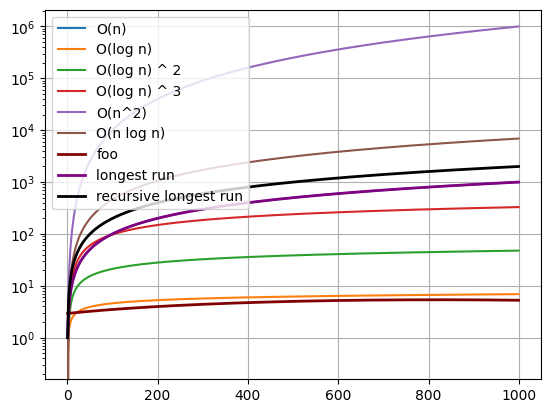

In [36]:
ax = complexity_fig.axes[0]
ax.plot(x_smooth, y_smooth, color='black', linewidth = 2, label = 'recursive longest run')
ax.legend()
ax.grid(True)

complexity_fig.canvas.draw()

complexity_fig